In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = False

In [2]:
import sys 
import os
sys.path.append('../')

from BackDiffuse_LT import BackDiffuse
from GetCoreData_fct import GetCoreData

In [38]:
CampC_data = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/IceCores/CampCentury.txt', '\s+', comment='#', names=['yr', 'depth', 'cm', 'antal', 'lambda', 'd18O', 'krads', 'proeve', 'optalt', 'test'])
dye2_data = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/IceCores/dye2.txt', '\s+', comment='#', names=['yr', 'depth', 'cm', 'antal', 'lambda', 'd18O', 'krads', 'proeve', 'optalt', 'test'])
dye3_data = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/IceCores/dye3.txt', '\s+', comment='#', names=['depth','d18O'])
CampC_data.drop(CampC_data.tail(1).index,inplace=True)
dye2_data.drop(dye2_data.tail(1).index,inplace=True)

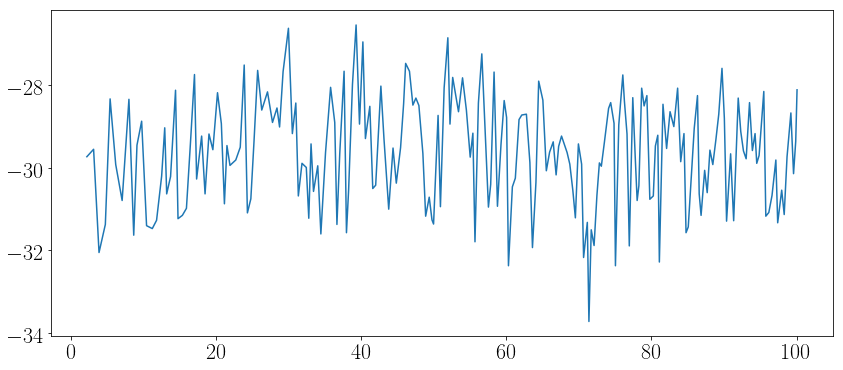

In [39]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(CampC_data['depth'], CampC_data['d18O'])

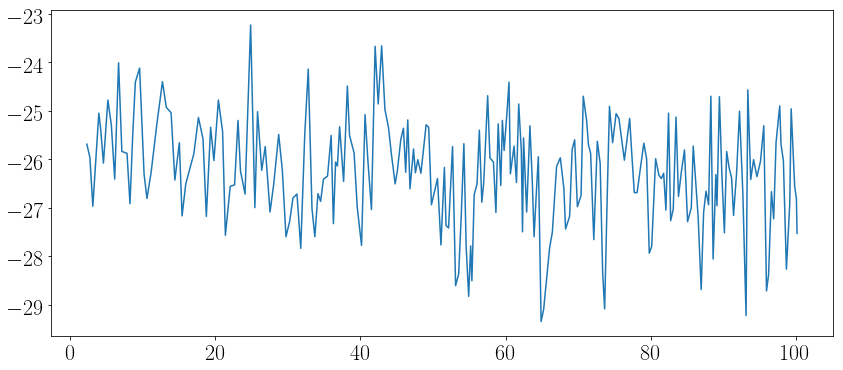

In [40]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(dye2_data['depth'], dye2_data['d18O'])

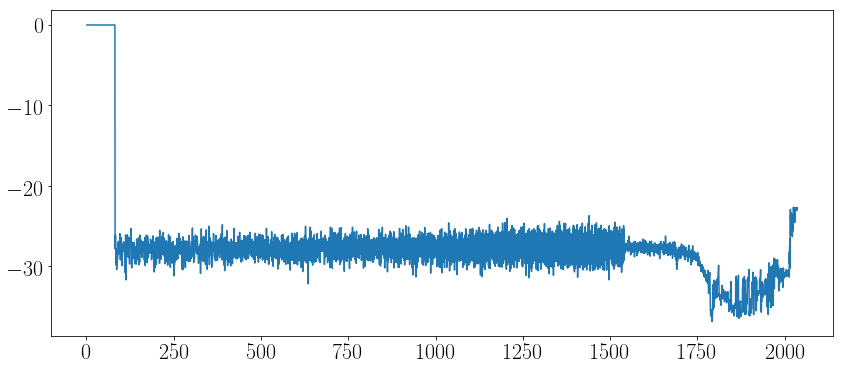

In [41]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(dye3_data['depth'], dye3_data['d18O'])

In [245]:
site_in = 'SiteA'

In [246]:
allData = GetCoreData('SiteA')

In [248]:
data_d18O = allData[0]
data_d18O_LT = allData[1]

,depth,d18O
1,1.160,-31.10
2,1.242,-33.96
3,1.324,-35.68
4,1.405,-39.11
5,1.485,-34.20
...,...,...
2962,128.493,-33.54
2963,128.528,-33.43
2964,128.564,-33.60
2965,128.599,-33.12


In [242]:
#Camp Century Ice Core Data: Readme file
#--------------------------------------------------------------------------------
#			World Data Center A - Paleoclimatology
#--------------------------------------------------------------------------------
#NOTE: PLEASE CITE ORIGINAL REFERENCE WHEN USING THIS DATA!!!!!
#
#
#NAME OF DATA SET: Camp Century Ice Core Data
#CONTRIBUTORS: David Fisher
#
#SUGGESTED DATA CITATION: Fisher, D., Camp Century Ice Core Data.
#International Ice Core Data Cooperative.
#IGBP Pages/World Data Center-A for Paleoclimatology
#NOAA/NGDC Paleoclimatology Program, Boulder CO, USA.
#
#ORIGINAL REFERENCE: Clausen, H.B., N.S. Gundestrup, S.J. Johnsen, 
#R. Bindschadler, and J. Zwally. 1988. Glaciological Invetigations 
#in the Crete Area, Central Greenland: A Search for a New Deep-Drlling Site, 
#Annals of Glaciology 10, International Glaciological Soceitey
#
#LAST UPDATE: 1998 (Original receipt by International Ice Core Data Cooperative)
#GEOGRAPHIC REGION: Greenland
#
#LIST OF FILES: readme_campcentury.txt (this file), DEL1977 .CCC,
#CC-1YNEW.CCC. Please see also Camp Century Particulates data and readme files.
#
#DESCRIPTION:
#In 1966, the U.S. Army Cold Regions Research and Engineering Laboratory (CRREL) 
#succeeded in drilling the first core to bedrock on the Greenland ice sheet 
#at Camp Century (77 deg. 10 min.N, 61 deg. 08 min. W).  By 1963, a thermal 
#coring system, the CRREL drill, had been developed under the scientific 
#leadership of Henri Bader as part of the U.S. International Geophysical
#Year (IGY) glaciology program in Greenland and Antartctica.  In 1960-61,  
#a 186 meter core was recovered.  A second hole was drilled in 1962 from 
#which 238 meters of core were obtained.  A third hole was started in 1963 
#and 264 meters of core were recovered.  In 1964, the third hole was extended 
#to 535 meters using the thermal drill in a fluid filled hole.  In
#1965, an electromechanical drill extended the third hole to 1,002 meters 
#and in July 1966, the bottom of the ice was reached at a depth of 1387.4 meters.  
#3.55 meters of frozen till was also recovered making the total depth of the 
#hole 1391 meters.
#
#Camp Century delta 18-O and accumulation data files:
#
#File name: CC-1YNEW.CCC 
#This is Camp Century delta 18-O data and are 1 year averages. 
#The data start in 1967 AD. and are computed on a new theoretical 
#Dansgaard/Johnsen model with a lambda = .38m/year ice equivilent 
#with a height of 429 meters. 
#
#File name: DEL1977 .CCC 
#This file is from CC1977.CCC and has a variable =delta DAF form. 
#The data start in 1975 and end in 1761 AD. and are annual averages 
#from May to April. 
#CAMP CENTURY 1977 ANNUAL LAYER THICKNESS AND DELTA 18-O
#a
#REFERENCES:
#
#Dansgaard, W., S. J. Johnsen, J. Moller, and C.C. Langway, Jr.  1969.  One thousand centuries of climatic record from Camp Century on the Greenland ice sheet. Science, 166:377-381.
#
#Hansen, L.B., and C.C. Langway, Jr. 1966. Deep core drilling in ice and core analysis at Camp Century, Greenland, 1961-1966. CRREL Spec. Report 126, no. 5, p.207-208.
#
#Johnsen, S.J., W. Dansgaard, H.B. Clausen, and C.C. Langway, Jr. 1970. Climatic oscillations 1200-2000 A.D. Nature 227:482-483.
#
#Johnsen, S.J., W. Dansgaard, H.B. Clausen, and C.C. Langway, Jr. 1972. Oxygen isotope profiles through the Antarctic and Greenland ice sheets. Nature 235:429-434.
#
#DATA DESCRIPTION:
#
#CAMP CENTURY 1977 CC-1  aar=year  lambda=annual layer thickness dybde=depth
#  AAR ,   DYBDE  ,  CM  ,  ANTAL,LAMBDA ,DELTA, KRADS , PROEVE  , OPTALT,
#  A.D.    (BUND)  (KRADS) (KRADS)  (M)    O18   (SYRE)   NUMMER   (L-FIL)
#
#DATA:
#

,All
0,depth d18O 1 1.160 -31.10 2 ...
1,depth_LT d18O_LT 1402 70.920 -33.6...
